# 12th session

# Applications of uncertainty

# St. Petersburg Game:

The St. Petersburg paradox is a famous problem in probability theory and economics. It involves a hypothetical lottery game where a fair coin is tossed until it comes up heads. The payoff for the game is 2 dollar raised to the power of the number of tosses it takes to get heads. So, if it takes one toss, you win 2 dollar; if it takes two tosses, you win 4 dollar; if it takes three tosses, you win 8 dollar, and so on. The expected value of this game is infinite, which means that theoretically, you should be willing to pay any finite amount of money to play this game. However, in reality, most people would not pay a large amount to play, which creates a paradox.

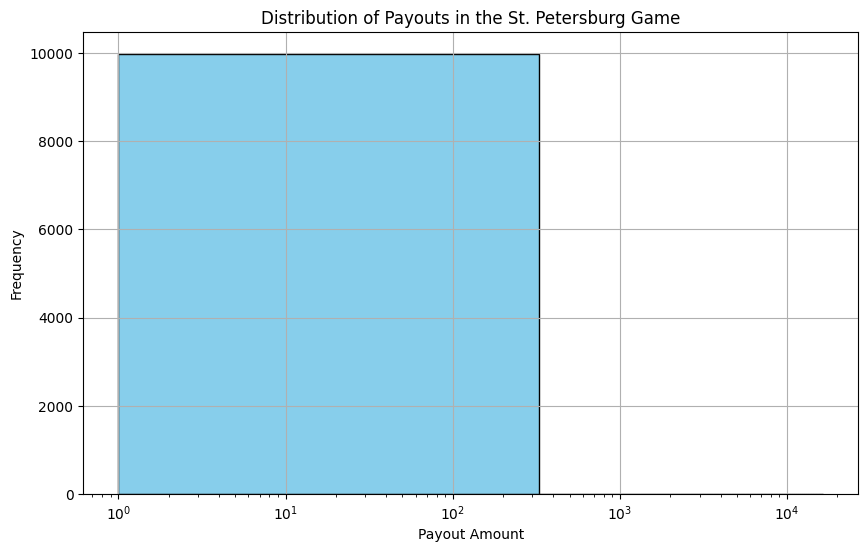

Simulated Expected Value: 9.6036


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from colored import Fore, Back, Style

def st_petersburg_game(num_trials):
    payouts = []
    for _ in range(num_trials):
        tosses = 0
        while np.random.rand() > 0.5:  # Toss until heads
            tosses += 1
        payouts.append(2**tosses)  # Payout is 2^n
    return payouts

# Run the simulation
num_trials = 10000
payouts = st_petersburg_game(num_trials)

# Plotting the payouts
plt.figure(figsize=(10, 6))
plt.hist(payouts, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Payouts in the St. Petersburg Game')
plt.xlabel('Payout Amount')
plt.ylabel('Frequency')
plt.xscale('log')  # Log scale for better visualization
plt.grid(True)
plt.show()

# Calculate expected value from simulation
expected_value = np.mean(payouts)
print(f"{Style.underline_color(1)}{Fore.black}{Back.green}Simulated Expected Value: {expected_value:.4f}")



## Solving the paradox: 


Gabriel Cramer and Daniel Bernoulli proposed a resolution to this paradox by introducing the concept of utility. They argued that the value of money is not linear; that is, a gain of $200 is not necessarily worth twice as much as a gain of 100 dollar. Instead, they suggested that individuals have a utility function, which measures the subjective value or satisfaction derived from different amounts of money.

The von Neumann-Morgenstern utility function $U(x)$ is used to evaluate gambles based on expected utility rather than expected value. The expected utility $𝑢$ is calculated as:

$$ U = \sum_{i = 1}^n P_{i} \times U(x_{i})$$

where $x_{i}$ are the possible outcomes and $P_{i}$ are the probabilities of those outcomes.

In the case of the St. Petersburg gamble, the certainty equivalent (the sure gain that would yield the same utility as the gamble) is determined by the equation:

$$ U(W) = \frac{1}{2}U(W+1)+\frac{1}{4}U(W+2)+\frac{1}{8}U(W+4)+ \dots $$

where $𝑊$ is the individual's current wealth.

If the utility function takes the logarithmic form $U(x) = ln(x)$ and the individual's current wealth 𝑊 is $50,000, the certainty equivalent would be about 9 dollar, even though the gamble has an infinite expected value. This shows that the subjective value of the gamble is much lower than its theoretical expected value, resolving the paradox.

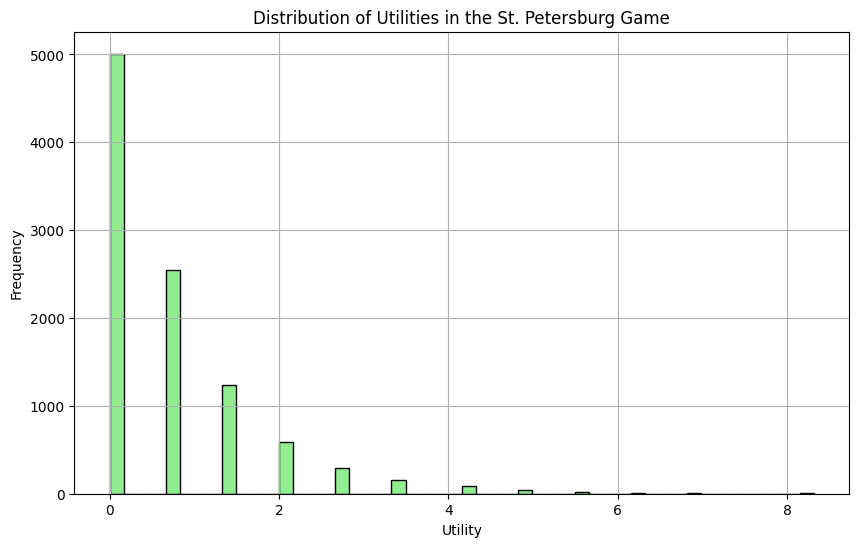

Simulated Expected Utility: 0.6873


In [2]:
def st_petersburg_game(num_trials, utility_function):
    payouts = []
    utilities = []
    for _ in range(num_trials):
        tosses = 0
        while np.random.rand() > 0.5:  # Toss until heads
            tosses += 1
        payout = 2**tosses  # Payout is 2^n
        payouts.append(payout)
        utilities.append(utility_function(payout))  # Calculate utility for the payout
    return payouts, utilities

def logarithmic_utility(x):
    return np.log(x)

num_trials = 10000
payouts, utilities = st_petersburg_game(num_trials, logarithmic_utility)

plt.figure(figsize=(10, 6))
plt.hist(utilities, bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Utilities in the St. Petersburg Game')
plt.xlabel('Utility')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

expected_utility = np.mean(utilities)
print(f"Simulated Expected Utility: {expected_utility:.4f}")

# The Gambler's Fallacy

In [3]:
def coin_toss(num_tosses):
    # Simulate coin tosses: 0 for tails, 1 for heads
    tosses = np.random.randint(0, 2, num_tosses)
    return tosses

def calculate_probabilities(tosses):
    heads = np.sum(tosses)
    tails = len(tosses) - heads
    total = len(tosses)
    return heads / total, tails / total

def game():
    print("Welcome to the Coin Toss Simulation!")
    
    num_tosses = int(input("Enter the number of times you want to toss the coin: "))
    tosses = coin_toss(num_tosses)
    
    # Calculate probabilities
    prob_heads, prob_tails = calculate_probabilities(tosses)
    
    print(f"\nResults of {num_tosses} coin tosses:")
    print(f"Heads: {np.sum(tosses)} ({prob_heads:.2%})")
    print(f"Tails: {num_tosses - np.sum(tosses)} ({prob_tails:.2%})")
    
    print("\nNote: Each toss is independent. The results of previous tosses do not affect future tosses.")

game()

Welcome to the Coin Toss Simulation!

Results of 70 coin tosses:
Heads: 33 (47.14%)
Tails: 37 (52.86%)

Note: Each toss is independent. The results of previous tosses do not affect future tosses.


# Normal Distritution

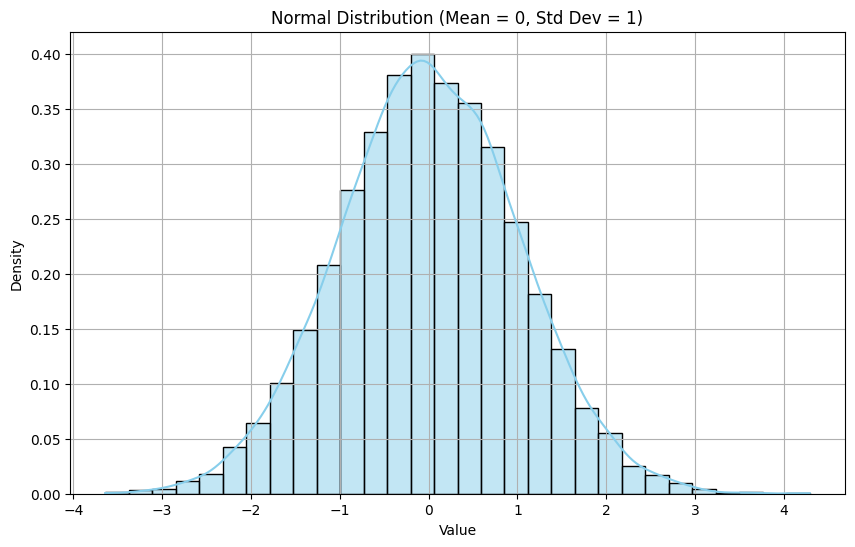

In [4]:
import seaborn as sns

mean = 0 
std_dev = 1  
num_samples = 10000  

# Generate random samples from a normal distribution
samples = np.random.normal(mean, std_dev, num_samples)

plt.figure(figsize=(10, 6))
sns.histplot(samples, bins=30, kde=True, color='skyblue', stat='density')
plt.title('Normal Distribution (Mean = 0, Std Dev = 1)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()


# Risk seeking individual VS Risk averse individual

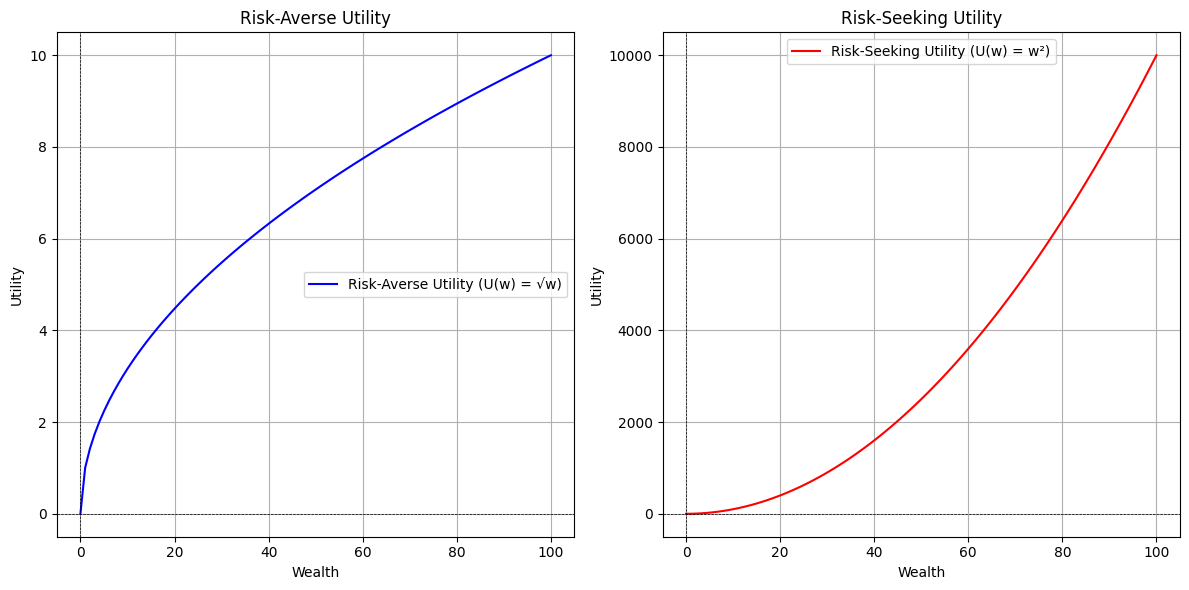

In [5]:
# Wealth levels
wealth = np.linspace(0, 100, 100)

# Utility functions
risk_averse_utility = np.sqrt(wealth)  # Risk-averse
risk_seeking_utility = wealth**2  # Risk-seeking

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Risk-Averse Utility
axs[0].plot(wealth, risk_averse_utility, label='Risk-Averse Utility (U(w) = √w)', color='blue')
axs[0].set_title('Risk-Averse Utility')
axs[0].set_xlabel('Wealth')
axs[0].set_ylabel('Utility')
axs[0].axhline(0, color='black', lw=0.5, ls='--')
axs[0].axvline(0, color='black', lw=0.5, ls='--')
axs[0].legend()
axs[0].grid(True)

# Plot Risk-Seeking Utility
axs[1].plot(wealth, risk_seeking_utility, label='Risk-Seeking Utility (U(w) = w²)', color='red')
axs[1].set_title('Risk-Seeking Utility')
axs[1].set_xlabel('Wealth')
axs[1].set_ylabel('Utility')
axs[1].axhline(0, color='black', lw=0.5, ls='--')
axs[1].axvline(0, color='black', lw=0.5, ls='--')
axs[1].legend()
axs[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# Returns of a risk averse individual VS Returns of a risk seeking individual

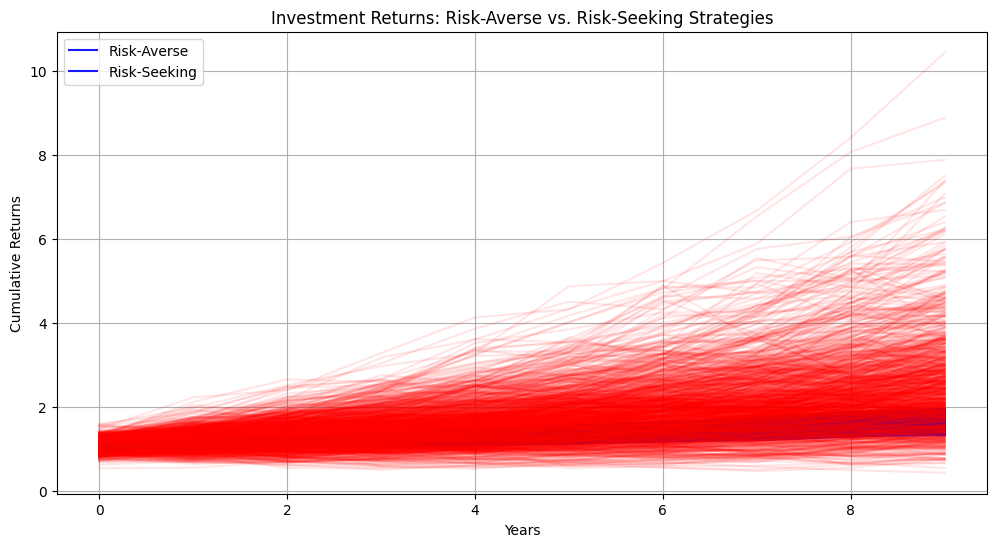

In [6]:
num_simulations = 1000
years = 10
risk_averse_mean = 0.05  # Average return for risk-averse
risk_averse_std = 0.02    # Standard deviation
risk_seeking_mean = 0.1   
risk_seeking_std = 0.15    

risk_averse_returns = np.random.normal(risk_averse_mean, risk_averse_std, (num_simulations, years))
risk_seeking_returns = np.random.normal(risk_seeking_mean, risk_seeking_std, (num_simulations, years))

cumulative_risk_averse = np.cumprod(1 + risk_averse_returns, axis=1)
cumulative_risk_seeking = np.cumprod(1 + risk_seeking_returns, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(cumulative_risk_averse.T, color='blue', alpha=0.9)
plt.plot(cumulative_risk_seeking.T, color='red', alpha=0.1)
plt.title('Investment Returns: Risk-Averse vs. Risk-Seeking Strategies')
plt.xlabel('Years')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.legend(['Risk-Averse', 'Risk-Seeking'])
plt.show()


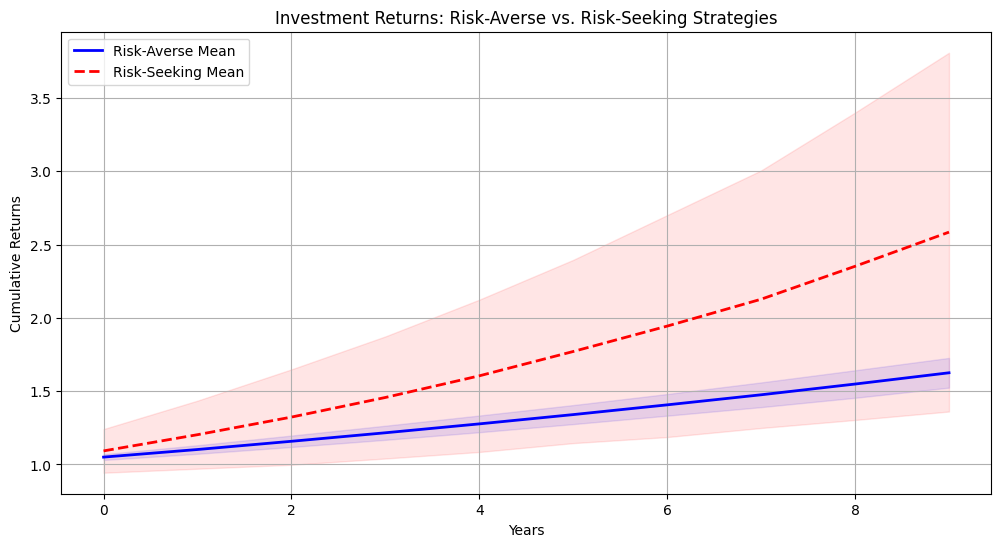

In [7]:
mean_risk_averse = np.mean(cumulative_risk_averse, axis=0)
mean_risk_seeking = np.mean(cumulative_risk_seeking, axis=0)
std_risk_averse = np.std(cumulative_risk_averse, axis=0)
std_risk_seeking = np.std(cumulative_risk_seeking, axis=0)

plt.figure(figsize=(12, 6))

# Risk-Averse Strategy
plt.plot(mean_risk_averse, color='blue', label='Risk-Averse Mean', linewidth=2)
plt.fill_between(range(years), mean_risk_averse - std_risk_averse, mean_risk_averse + std_risk_averse, 
                 color='blue', alpha=0.1)

# Risk-Seeking Strategy
plt.plot(mean_risk_seeking, color='red', linestyle='--', label='Risk-Seeking Mean', linewidth=2)
plt.fill_between(range(years), mean_risk_seeking - std_risk_seeking, mean_risk_seeking + std_risk_seeking, 
                 color='red', alpha=0.1)

plt.title('Investment Returns: Risk-Averse vs. Risk-Seeking Strategies')
plt.xlabel('Years')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.legend()
plt.show()


# Insurance:

The following code simulates a decision-making scenario involving risk and insurance using a utility-based approach. It focuses on a risk-averse individual who must decide how much to pay for insurance to mitigate potential financial losses. The individual has an initial wealth and faces a certain probability of incurring a loss. The goal is to calculate the maximum insurance premium that this individual would be willing to pay based on their utility function, which reflects their risk preferences.

$$ EU = p U(W-L) + (1-p) U(W) $$

utility function:

$$ U(w) = \sqrt{w}$$

In [8]:
W = 100000  # Initial wealth
L = 20000   # Loss amount
p = 0.1     # Probability of loss

def utility(w):
    return np.sqrt(w)

# Calculate expected utility without insurance
EU_no_insurance = p * utility(W - L) + (1 - p) * utility(W)

# Function to calculate the premium
def calculate_premium(EU_no_insurance):
    # Set up the equation: EU_insurance = EU_no_insurance
    # EU_insurance = sqrt(W - P)
    # Solve for P
    for P in range(0, 10000):  # Test premiums from 0 to 10,000
        EU_insurance = utility(W - P)
        if np.isclose(EU_insurance, EU_no_insurance, atol=0.01):  # Check if close enough
            return P
    return None  # If no premium found

max_premium = calculate_premium(EU_no_insurance)

print(f"The maximum premium a risk-averse individual is willing to pay is: ${max_premium:.2f}")

The maximum premium a risk-averse individual is willing to pay is: $2093.00


## Insurance Premium Calculation:

The premium is the amount paid for insurance. The code calculates the maximum premium $p$ that maintains the expected utility with insurance equal to the expected utility without insurance.

insurance expected utility = $EU_{insurance} = W(U-P)$

the goal is -> $EU_{insurance} = EU_{\text{no } insurance}$

A simple iterative method is used to find the maximum premium. The code tests various premium values to find one that makes the expected utility with insurance close to the expected utility without insurance.

# Expected portfolio return and its risk

In [9]:
# Portfolio allocations
weights = np.array([0.3, 0.5, 0.2])  # 30% Stocks, 50% Bonds, 20% Real Estate

# Expected returns and standard deviations
expected_returns = np.array([0.08, 0.04, 0.06])  # 8%, 4%, 6%
std_devs = np.array([0.15, 0.05, 0.10])  # 15%, 5%, 10%

# Calculate expected portfolio return
expected_portfolio_return = np.dot(weights, expected_returns)

# Assuming correlations: Stocks-Bonds: 0.2, Stocks-RealEstate: 0.3, Bonds-RealEstate: 0.1
correlation_matrix = np.array([[1, 0.2, 0.3],
                                [0.2, 1, 0.1],
                                [0.3, 0.1, 1]])

# Create covariance matrix
covariance_matrix = np.diag(std_devs) @ correlation_matrix @ np.diag(std_devs)

# Calculate portfolio risk (standard deviation)
portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
portfolio_std_dev = np.sqrt(portfolio_variance)

print(f"Expected Portfolio Return: {expected_portfolio_return:.2%}")
print(f"Portfolio Standard Deviation (Risk): {portfolio_std_dev:.2%}")

Expected Portfolio Return: 5.60%
Portfolio Standard Deviation (Risk): 6.43%


# CRRA utility function

$$ U(c) = \frac{c^{1 - \theta}}{1-\theta}$$

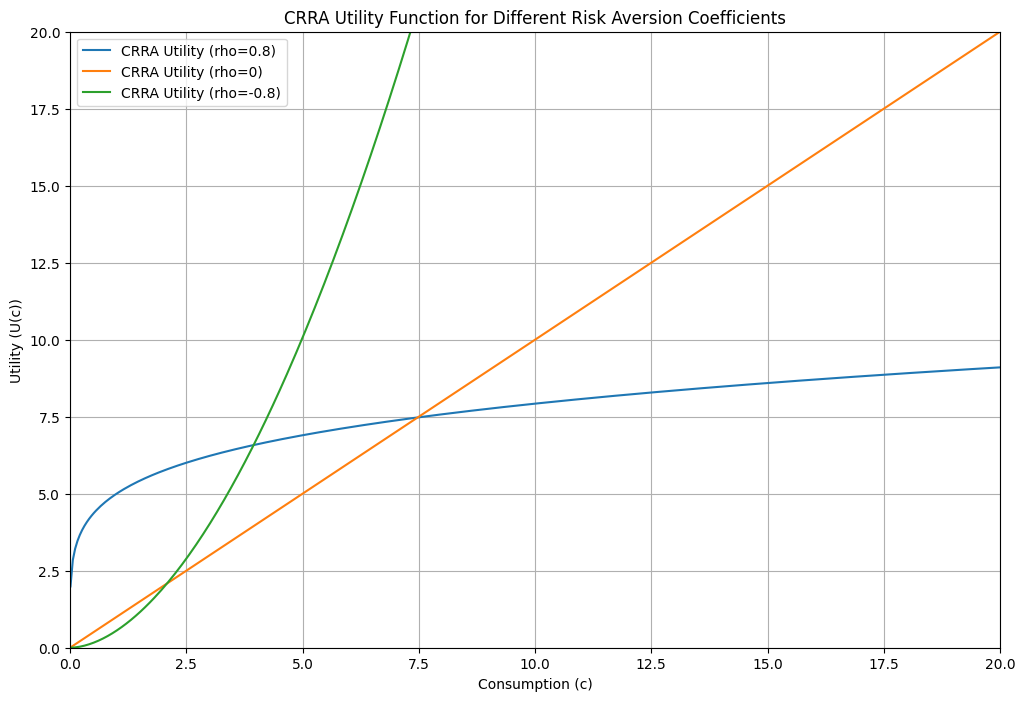

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def crra_utility(c, rho):
    if rho == 1:
        return np.log(c)  # Special case for rho = 1
    else:
        return (c**(1 - rho)) / (1 - rho)

c = np.linspace(0.01, 50, 1000)  

rho_values = [0.8, 0, -0.8]  


plt.figure(figsize=(12, 8))
for rho in rho_values:
    utility_values = crra_utility(c, rho)
    plt.plot(c, utility_values, label=f'CRRA Utility (rho={rho})')

plt.title('CRRA Utility Function for Different Risk Aversion Coefficients')
plt.xlabel('Consumption (c)')
plt.ylabel('Utility (U(c))')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.ylim(0, 20)  
plt.xlim(0, 20) 
plt.show()


# Intertemporal consumption

Consumption over time periods: [ 10.          11.11111111  12.5         14.28571429  16.66666667
  20.          25.          33.33333333  50.         100.        ]
Utility over time periods: [  50.           61.72839506   78.125       102.04081633  138.88888889
  200.          312.5         555.55555556 1250.         5000.        ]
Total discounted utility: 5132.72305631337


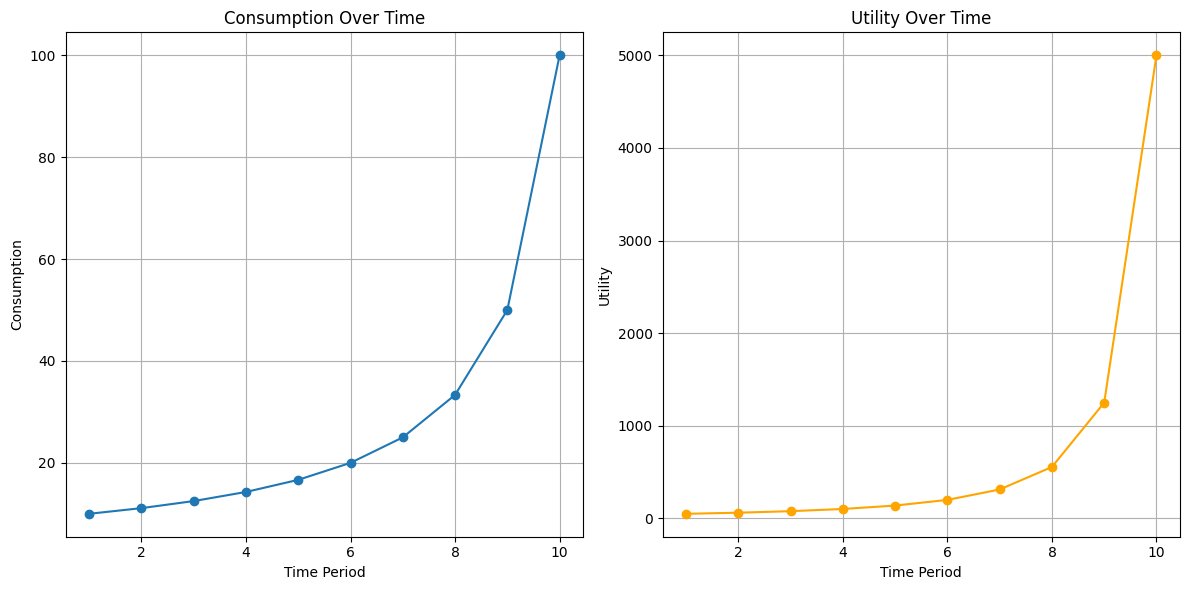

In [ ]:
# Parameters
rho = -1.0  # Risk aversion coefficient
discount_factor = 0.95  # Discount factor for future utility
initial_wealth = 100  # Initial wealth
time_periods = 10  # Number of time periods

# Arrays to hold consumption and utility values
consumption = np.zeros(time_periods)
utility = np.zeros(time_periods)

# Consumption strategy: equally allocate wealth over time
for t in range(time_periods):
    consumption[t] = initial_wealth / (time_periods - t)
    utility[t] = crra_utility(consumption[t], rho)

# Calculate total utility over time
total_utility = sum(utility[t] * (discount_factor ** t) for t in range(time_periods))

print("Consumption over time periods:", consumption)
print("Utility over time periods:", utility)
print("Total discounted utility:", total_utility)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, time_periods + 1), consumption, marker='o')
plt.title('Consumption Over Time')
plt.xlabel('Time Period')
plt.ylabel('Consumption')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(1, time_periods + 1), utility, marker='o', color='orange')
plt.title('Utility Over Time')
plt.xlabel('Time Period')
plt.ylabel('Utility')
plt.grid()
plt.tight_layout()
plt.show()


# Source: 

- Essential microeconomics, john g riley